# BUAN-651-AB Final Project 

- Dalli Dalli, Brinda Shah, Mohit Phulwani, Shravan Mollera Thammaiah, Lina Gallinelli 

### Project Summary

The project hopes to use existing data to predict the price of a car.  The data will be analyzed to recognize the relationship between
<br> the pricing of a car and its performance. <br>

### Background & Context 

For most of us want buy a car, we want know about this car's information such as the car's year when it was first released, <br> 
the number of units sold and the average price. <br>
Would like to predict the price of an automobile using available data. Analyze the relationship that exists between price and these <br>
factors by using information on car specifications such as horsepower, torque, transmission type, drivetrain, fuel economy, number of doors, <br>
price, model year range, body type, engine type, and number of cylinders, etc., and identify the relationship between the data and the price of <br>
the car by analyzing the data. <br>


### Date Dictionary 

1. Company
2. Model
3. Harsepower 
4. Torque
5. Transmission Type 
6. Drivetrain
7. Fuel Economy
8. Number of Doors 
9. Price 
10. Model Year Range 
11. Body Type 
12. Engine type 
13. Number of Cylinders 


### Notebook Contents 

# Importing the Libraries

In [10]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
%matplotlib inline 
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Reading Data from CSV

In [12]:
Data = pd.read_csv("Car_Models.csv")  

### Summary Statistics

In [192]:
Data.describe().round(2)

,Horsepower,Torque,Mileage,Price,Year,Engine
count,404.00,404.00,404.00,404.00,404.00,404.00
mean,298.99,305.70,36.88,70229.74,2017.90,2.08
std,188.53,174.17,61.27,212960.83,1.49,0.53
min,68.00,63.00,9.00,1.10,2001.00,1.20
25%,175.00,184.00,19.50,33300.00,2018.00,2.00
50%,250.00,264.00,24.50,33300.00,2018.00,2.00
75%,355.00,377.75,30.00,33300.00,2018.00,2.00
max,1050.00,1000.00,520.00,3000000.00,2022.00,6.50


## Renaming Columns

In [14]:
Data = Data.rename(columns={'Fuel Economy': 'Mileage'})

In [15]:
Data = Data.rename(columns={'Engine Type': 'Engine'})

In [16]:
Data = Data.rename(columns={'Transmission Type': 'Transmission'})

In [17]:
Data = Data.rename(columns={'Model Year Range': 'Year'})

In [18]:
Data.head()

,Company,Model,Horsepower,Torque,Transmission,Drivetrain,Mileage,Number of Doors,Price,Year,Body Type,Engine,Number of Cylinders
0,Ferrari,812 Superfast,789 hp,530 lb-ft,7-speed automatic,RWD,13/20 mpg,2,"$366,712",2018 - Present,Coupe,6.5L V12,12
1,Ferrari,F8 Tributo,710 hp,568 lb-ft,7-speed automatic,RWD,15/19 mpg,2,"$276,550",2020 - Present,Coupe,3.9L V8,8
2,Ferrari,Roma,611 hp,560 lb-ft,8-speed automatic,RWD,16/24 mpg,2,"$218,750",2021 - Present,Coupe,3.9L V8,8
3,Ferrari,Portofino M,612 hp,561 lb-ft,8-speed automatic,RWD,16/22 mpg,2,"$254,475",2021 - Present,Convertible,3.9L V8,8
4,Ferrari,SF90 Stradale,986 hp,590 lb-ft,8-speed automatic,AWD,18 mpg (combined),2,"$625,000",2020 - Present,Coupe,4.0L V8,8


In [19]:
print(f'There are {Data.shape[0]} rows and {Data.shape[1]} columns.')  # f-string
# same as Data.shape

There are 404 rows and 13 columns.


In [20]:
# looking at which columns have the most missing values
Data.isnull().sum().sort_values(ascending=False)

Price                  6
Mileage                5
Number of Cylinders    2
Year                   1
Body Type              1
Engine                 1
Company                0
Model                  0
Horsepower             0
Torque                 0
Transmission           0
Drivetrain             0
Number of Doors        0
dtype: int64

## Convert Numerical Data Variables

### Convert Horsepower to number

In [23]:
def horsepower_split(Horsepower):
    if isinstance(Horsepower, str):
        return Horsepower.split(' ')[0]
    else:
        return np.nan

In [24]:
Data.Horsepower = Data.Horsepower.apply(horsepower_split)

In [25]:
Data.Horsepower=pd.to_numeric(Data.Horsepower, errors='coerce')

### Covert Year to Number

In [27]:
def Year_split(Year):
    if isinstance(Year, str):
        return Year.split(' ')[0]
    else:
        return np.nan

In [28]:
Data.Year = Data.Year.apply(Year_split)

In [29]:
Data.Year=pd.to_numeric(Data.Year, errors='coerce')

### Covert Engine to Number

In [31]:
def Engine_split(Engine):
    if isinstance(Engine, str):
        return Engine.split('L')[0]
    else:
        return np.nan

In [32]:
Data.Engine = Data.Engine.apply(Engine_split)

In [33]:
Data.Engine=pd.to_numeric(Data.Engine, errors='coerce')

### Covert Torque to Number

In [35]:
def torque_split(Torque):
    if isinstance(Torque, str):
        return Torque.split(' ')[0]
    else:
        return np.nan

In [36]:
Data.Torque = Data.Torque.apply(torque_split)

In [37]:
Data.Torque=pd.to_numeric(Data.Torque, errors='coerce')

### Mileage to Number

In [39]:
def fuel_economy_split(Mileage):
    if isinstance(Mileage, str):
        return Mileage.split(' ')[0]
    else:
        return np.nan

In [40]:
Data.Mileage = Data.Mileage.apply(fuel_economy_split)

In [41]:
def process_mileage(value):
    if isinstance(value, str):  # Only process if the value is a string
        # Standardize the separator to "/"
        value = value.replace('-', '/')
        if '/' in value:
            # Split the string, convert to floats, and calculate average
            nums = list(map(float, value.split('/')))
            return sum(nums) / len(nums)
    # Return the value as is if it's already a number
    return float(value)

In [42]:
# Apply the function to the 'mileage' column
Data['Mileage'] = Data['Mileage'].apply(process_mileage)


### Covert Price to Number

In [44]:
import re

def normalize_price(price_value):
    """Splits the price and applies necessary conversion based on unit."""
    # Convert price to string
    price_value = str(price_value)
    
    # Remove any currency symbols and units
    price_value = price_value.replace('₹', '').replace('Rs.', '').replace('$', '').replace('Lakh', '').replace('lakhs', '').replace(',', '').strip()

    # Split the price value at space and only take the 0th index
    price_parts = price_value.split()
    price = price_parts[0]  # Take the numeric part (0th index)
    
    # Convert to float
    try:
        price = float(price)
    except ValueError:
        return None  # Return None if conversion fails (e.g., 'Negotiable')

    # Check for units and apply multiplication logic
    if '$' in price_value:  # If the price is in dollars, multiply by 84
        price *= 84
    elif 'Lakh' in price_value or 'lakhs' in price_value:  # If the price is in Lakhs, multiply by 100000
        price *= 100000
    
    return price



In [45]:
Data['Price'] = Data['Price'].apply(normalize_price)

### Create Filtered Data for visualizations 

In [47]:
# Get the top 5 companies by count
top_5_companies = Data.groupby('Company')['Company'].count().nlargest(5).index  #since there are so many distinct categorical variables

# Filter the DataFrame to include only the top 5 companies     
filtered_df = Data[Data['Company'].isin(top_5_companies)]

In [48]:
# Get the top 5 companies by count
top_5_companies1 = Data.groupby('Transmission')['Transmission'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df1 = Data[Data['Transmission'].isin(top_5_companies1)]

In [49]:
top_5_companies2 = Data.groupby('Drivetrain')['Drivetrain'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df2 = Data[Data['Drivetrain'].isin(top_5_companies2)]

In [50]:
top_5_companies3 = Data.groupby('Body Type')['Body Type'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df3 = Data[Data['Body Type'].isin(top_5_companies3)]

In [51]:
top_5_companies4 = Data.groupby('Engine')['Engine'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df4 = Data[Data['Engine'].isin(top_5_companies4)]

In [52]:
top_5_companies5 = Data.groupby('Number of Cylinders')['Number of Cylinders'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df5 = Data[Data['Number of Cylinders'].isin(top_5_companies5)]

In [53]:
top_5_companies6 = Data.groupby('Number of Doors')['Number of Doors'].count().nlargest(5).index

# Filter the DataFrame to include only the top 5 companies
filtered_df6 = Data[Data['Number of Doors'].isin(top_5_companies6)]

## Exploratory Data Analysis

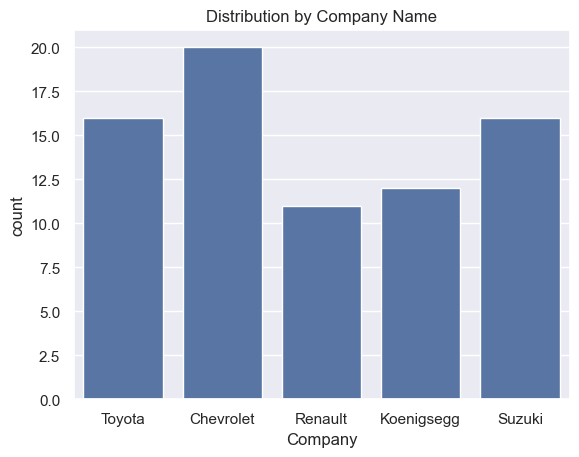

In [55]:
sns.countplot(x = 'Company', data=filtered_df);
plt.title('Distribution by Company Name');
plt.show()


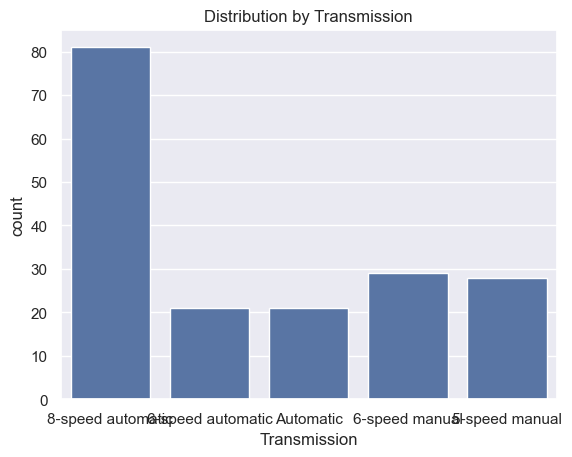

In [56]:
sns.countplot(x='Transmission', data=filtered_df1);
plt.title('Distribution by Transmission');
plt.show()



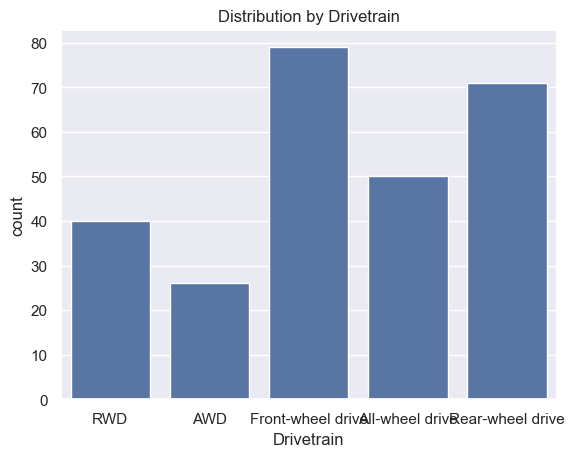

In [57]:
sns.countplot(x='Drivetrain', data=filtered_df2);
plt.title('Distribution by Drivetrain');
plt.show()


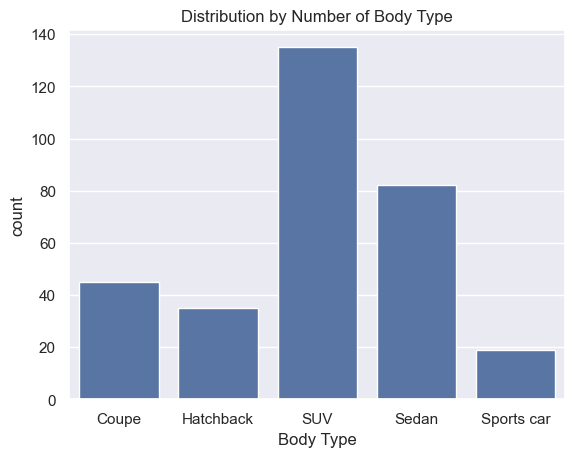

In [58]:
sns.countplot(x='Body Type', data=filtered_df3);
plt.title('Distribution by Number of Body Type');
plt.show()


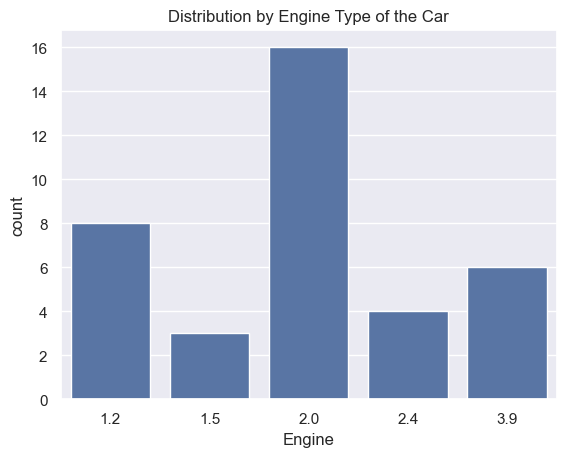

In [59]:
sns.countplot(x='Engine', data=filtered_df4);
plt.title('Distribution by Engine Type of the Car');
plt.show()


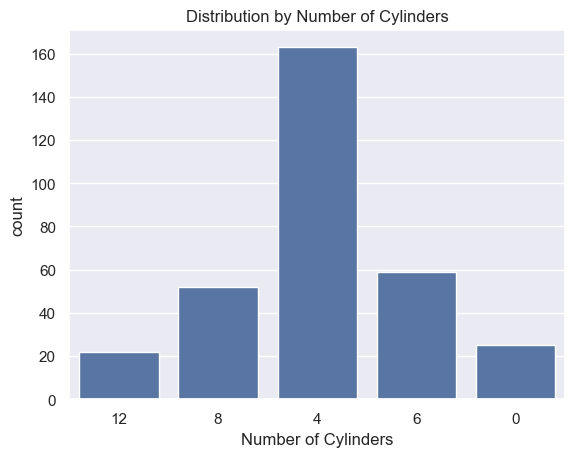

In [60]:
sns.countplot(x='Number of Cylinders', data=filtered_df5);
plt.title('Distribution by Number of Cylinders');
plt.show()


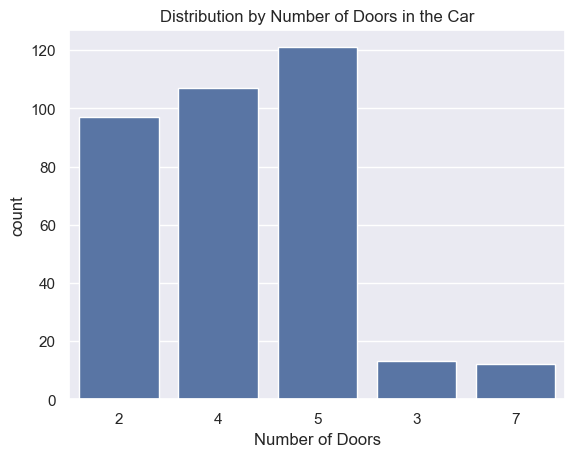

In [61]:
sns.countplot(x='Number of Doors', data=filtered_df6);
plt.title('Distribution by Number of Doors in the Car');
plt.show()

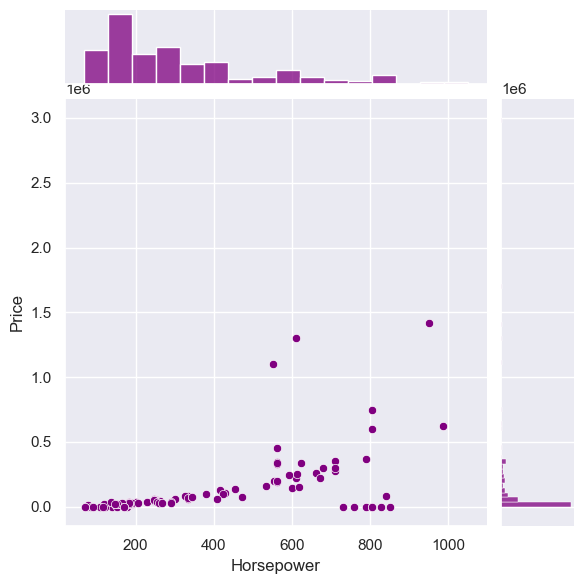

In [62]:
# bivariate joint plots with the relationship of numerical variables with price 

sns.jointplot(x=Data['Horsepower'], y=Data['Price'],color='purple')
plt.show()

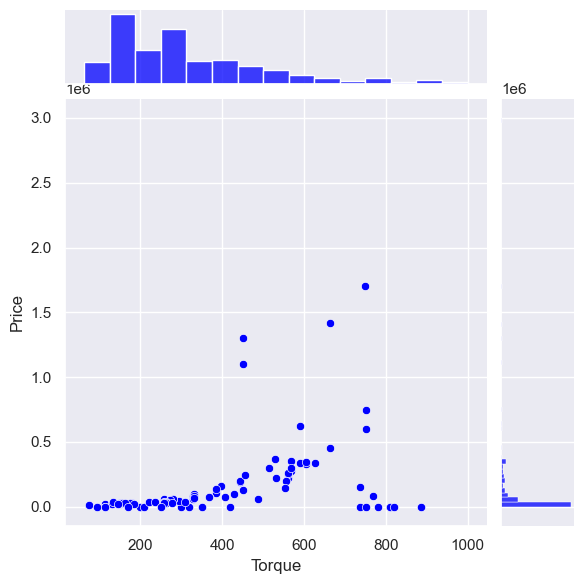

In [63]:
sns.jointplot(x=Data['Torque'], y=Data['Price'],color='blue')
plt.show()

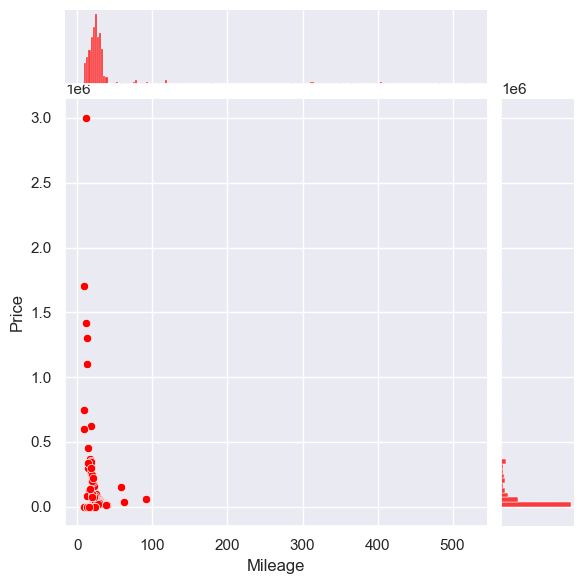

In [64]:
sns.jointplot(x=Data['Mileage'], y=Data['Price'],color='red')
plt.show()

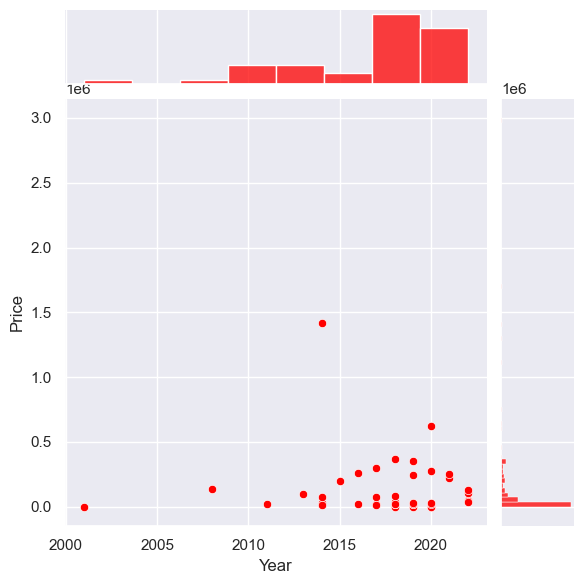

In [65]:
sns.jointplot(x=Data['Year'], y=Data['Price'],color='red')
plt.show()

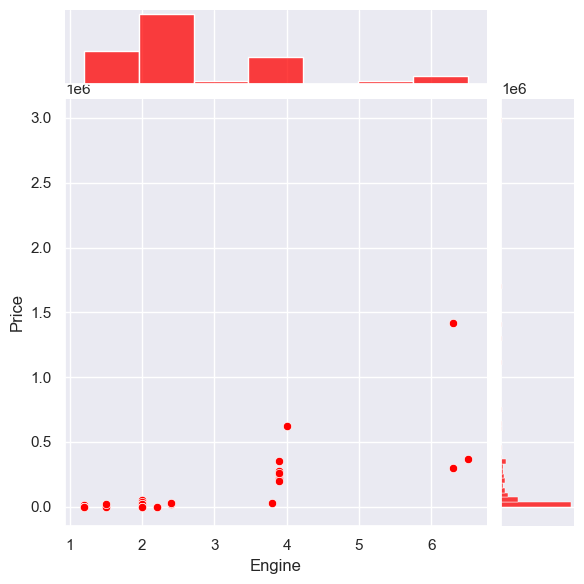

In [66]:
sns.jointplot(x=Data['Engine'], y=Data['Price'],color='red')
plt.show()

In [67]:
# correlation matrix

Data.corr(numeric_only=True)

,Horsepower,Torque,Mileage,Price,Year,Engine
Horsepower,1.000000,0.934806,0.218682,0.562703,0.150282,0.850342
Torque,0.934806,1.000000,0.292824,0.421822,0.147603,0.789656
Mileage,0.218682,0.292824,1.000000,-0.243586,0.019181,-0.377592
Price,0.562703,0.421822,-0.243586,1.000000,-0.044736,0.754961
Year,0.150282,0.147603,0.019181,-0.044736,1.000000,0.145331
Engine,0.850342,0.789656,-0.377592,0.754961,0.145331,1.000000


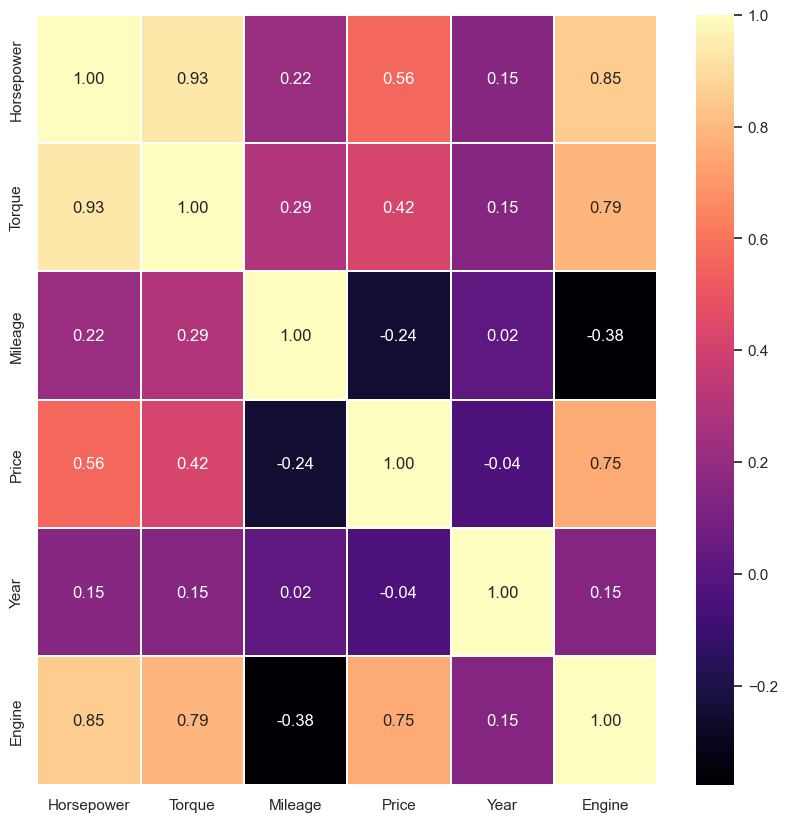

In [68]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data.corr(numeric_only=True), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

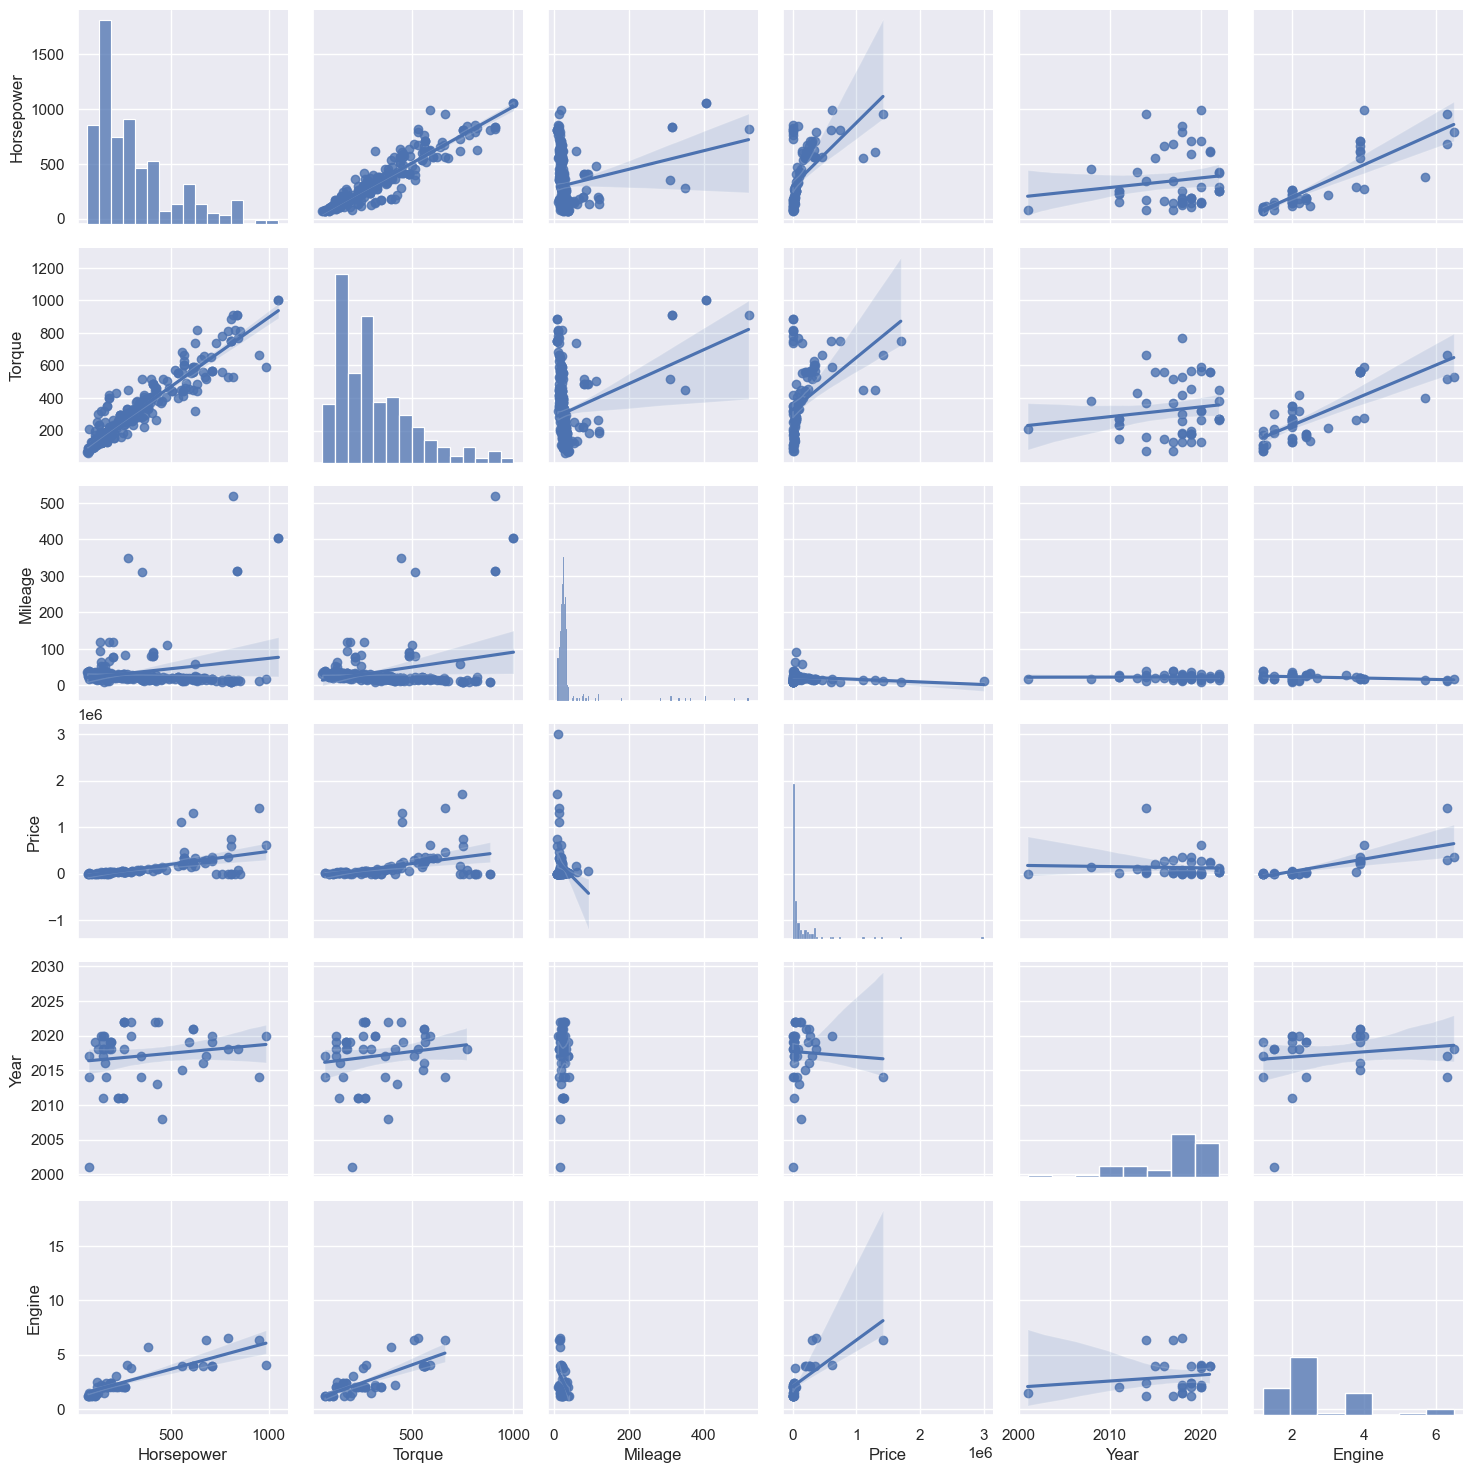

In [69]:
sns.pairplot(Data, kind ="reg")
plt.show()

## Boxplots

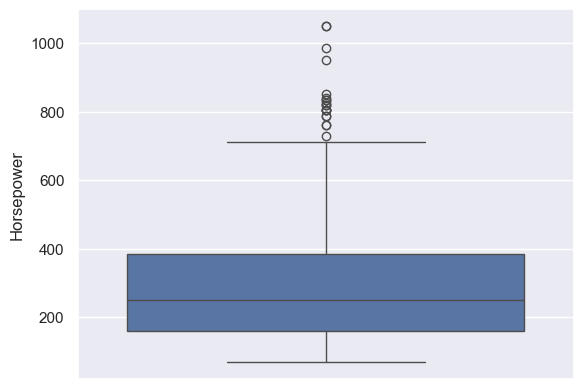

In [71]:
sns.boxplot(Data['Horsepower'])
plt.show()

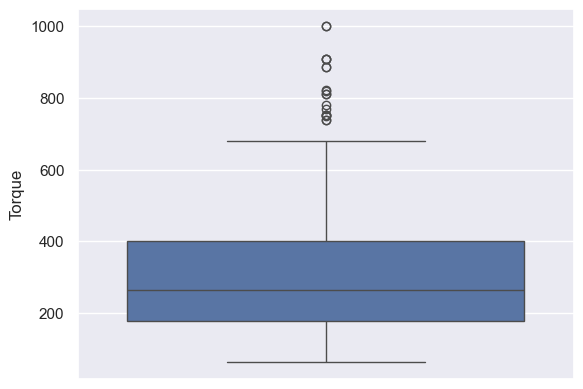

In [72]:
sns.boxplot(Data['Torque'])
plt.show()

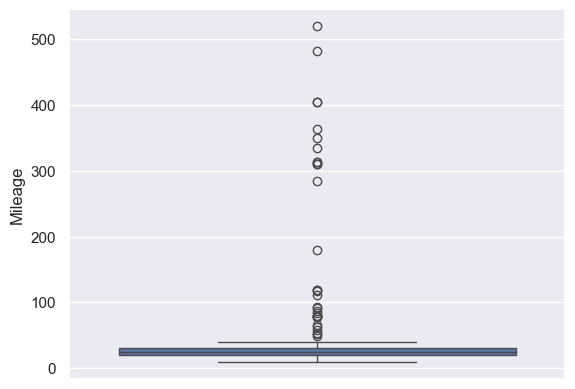

In [73]:

sns.boxplot(Data['Mileage'])
plt.show()

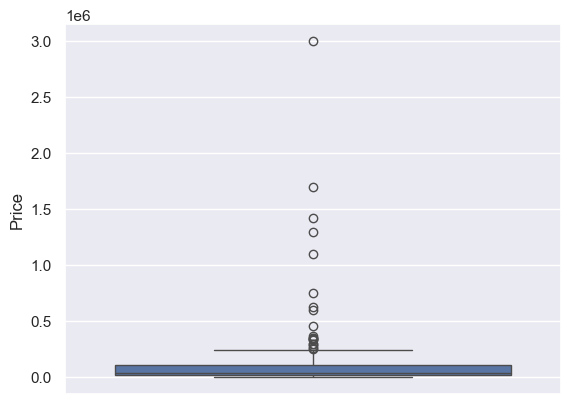

In [74]:
sns.boxplot(Data['Price'])
plt.show()

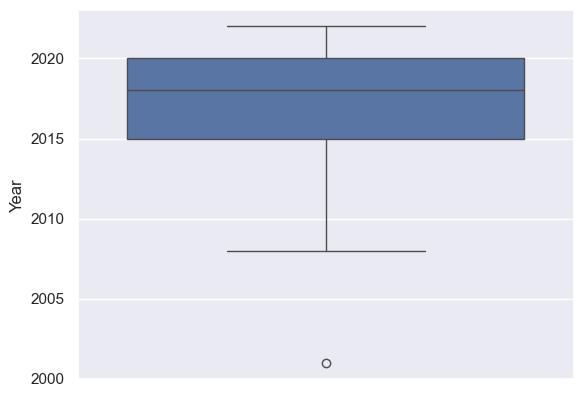

In [75]:
sns.boxplot(Data['Year'])
plt.show()

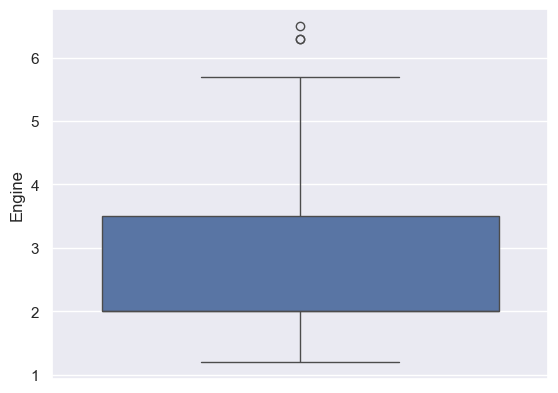

In [76]:
sns.boxplot(Data['Engine'])
plt.show()

# Investigate outliers

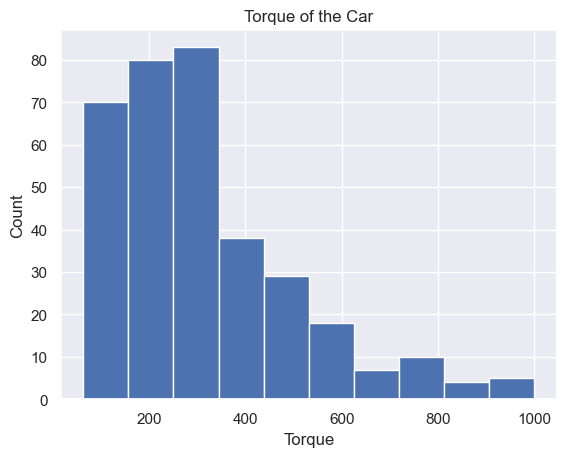

In [78]:
Data.hist('Torque', bins=10);
plt.title('Torque of the Car');
plt.xlabel('Torque');
plt.ylabel('Count');
plt.show()



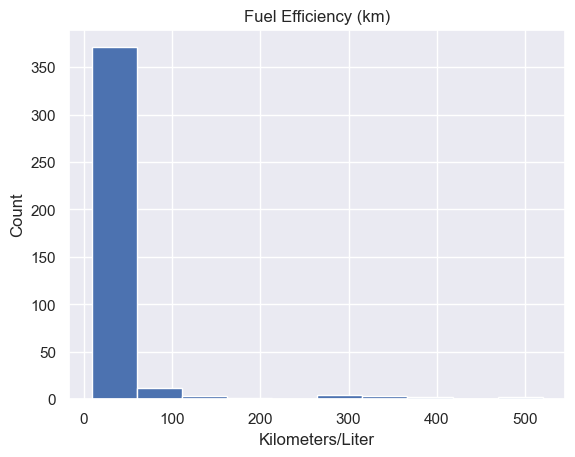

In [79]:
Data.hist('Mileage', bins=10);
plt.title('Fuel Efficiency (km)');
plt.xlabel('Kilometers/Liter');
plt.ylabel('Count');
plt.show()

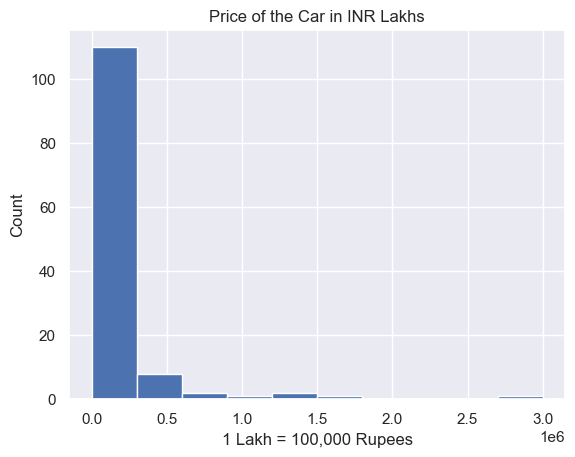

In [80]:
Data.hist('Price', bins=10);
plt.title('Price of the Car in INR Lakhs');
plt.xlabel('1 Lakh = 100,000 Rupees');
plt.ylabel('Count');
plt.show()

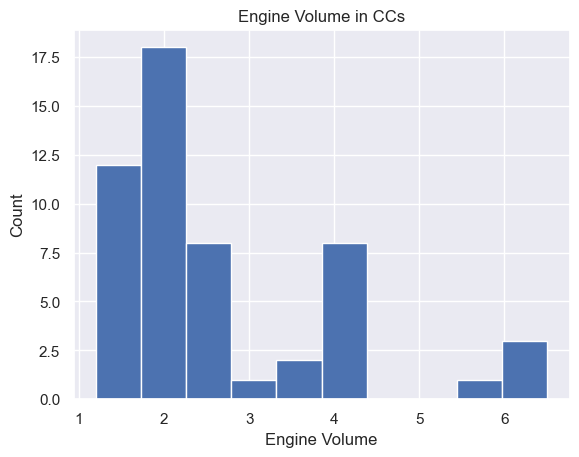

In [81]:
Data.hist('Engine', bins=10);
plt.title('Engine Volume in CCs');
plt.xlabel('Engine Volume');
plt.ylabel('Count');
plt.show()

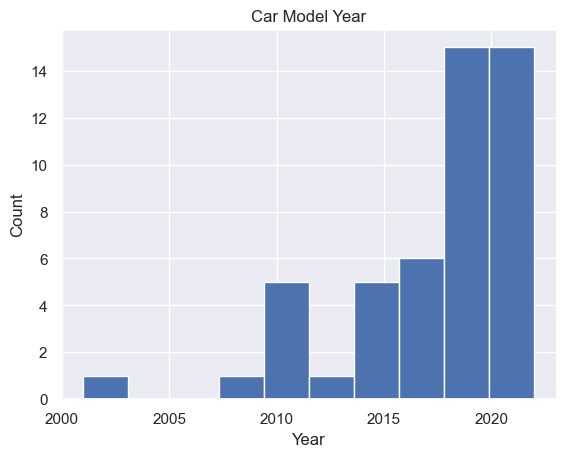

In [82]:
Data.hist('Year', bins=10);
plt.title('Car Model Year');
plt.xlabel('Year');
plt.ylabel('Count');
plt.show()

## Preparation for Modeling

#### Drop Columns that are not necessary

In [86]:
Data.drop(['Company'], axis=1, inplace=True)

In [87]:
Data.drop(['Model'], axis=1, inplace=True)

#### Get dummies for categorical variables

In [89]:
Data = pd.get_dummies(Data, columns=['Transmission'])
Data = pd.get_dummies(Data, columns=['Drivetrain'])
Data = pd.get_dummies(Data, columns=['Number of Doors'])
Data = pd.get_dummies(Data, columns=['Body Type'])
Data = pd.get_dummies(Data, columns=['Number of Cylinders'])
Data.head()

,Horsepower,Torque,Mileage,Price,Year,Engine,Transmission_10-speed automatic,Transmission_4 speed Manual,Transmission_4-motor all-wheel drive,Transmission_4-speed automatic,...,"Number of Cylinders_4, 6, 2008",Number of Cylinders_4/6,Number of Cylinders_4/6/2008,Number of Cylinders_6,Number of Cylinders_6 or 8,"Number of Cylinders_6, 8",Number of Cylinders_6-8,Number of Cylinders_6/8,Number of Cylinders_8,Number of Cylinders_V6
0,789.0,530.0,16.5,366712.0,2018.0,6.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,710.0,568.0,17.0,276550.0,2020.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,611.0,560.0,20.0,218750.0,2021.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,612.0,561.0,19.0,254475.0,2021.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,986.0,590.0,18.0,625000.0,2020.0,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Filll in missing Values with Median

In [91]:
Data.Engine.fillna(Data.Engine.median(),inplace=True)

In [92]:
Data.Price.fillna(Data.Price.median(),inplace=True)

In [93]:
Data.Torque.fillna(Data.Torque.median(),inplace=True)

In [94]:
Data.Year.fillna(Data.Year.median(),inplace=True)

In [95]:
Data.Horsepower.fillna(Data.Horsepower.median(),inplace=True)

In [96]:
Data.Mileage.fillna(Data.Mileage.median(),inplace=True)

In [97]:
Data.head()

,Horsepower,Torque,Mileage,Price,Year,Engine,Transmission_10-speed automatic,Transmission_4 speed Manual,Transmission_4-motor all-wheel drive,Transmission_4-speed automatic,...,"Number of Cylinders_4, 6, 2008",Number of Cylinders_4/6,Number of Cylinders_4/6/2008,Number of Cylinders_6,Number of Cylinders_6 or 8,"Number of Cylinders_6, 8",Number of Cylinders_6-8,Number of Cylinders_6/8,Number of Cylinders_8,Number of Cylinders_V6
0,789.0,530.0,16.5,366712.0,2018.0,6.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,710.0,568.0,17.0,276550.0,2020.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,611.0,560.0,20.0,218750.0,2021.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,612.0,561.0,19.0,254475.0,2021.0,3.9,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,986.0,590.0,18.0,625000.0,2020.0,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [98]:
Data.corr()

,Horsepower,Torque,Mileage,Price,Year,Engine,Transmission_10-speed automatic,Transmission_4 speed Manual,Transmission_4-motor all-wheel drive,Transmission_4-speed automatic,...,"Number of Cylinders_4, 6, 2008",Number of Cylinders_4/6,Number of Cylinders_4/6/2008,Number of Cylinders_6,Number of Cylinders_6 or 8,"Number of Cylinders_6, 8",Number of Cylinders_6-8,Number of Cylinders_6/8,Number of Cylinders_8,Number of Cylinders_V6
Horsepower,1.000000,0.910634,0.161815,0.255936,0.045967,0.332395,0.005739,0.003750,0.200791,0.024568,...,-0.022504,-0.026018,-0.012961,0.090999,0.033072,-0.012077,-0.039273,-0.026018,0.409019,0.016140
Torque,0.910634,1.000000,0.220189,0.234152,0.038142,0.218629,0.017063,0.007216,0.244224,-0.014920,...,-0.020736,-0.023974,-0.011942,0.069689,0.035022,-0.006872,-0.036188,-0.023974,0.390857,-0.009365
Mileage,0.161815,0.220189,1.000000,-0.065005,0.017294,-0.049850,-0.044206,-0.017149,0.319418,-0.026764,...,-0.020087,-0.018389,-0.014960,-0.097335,-0.014146,-0.029828,-0.042455,-0.023496,-0.131892,-0.009262
Price,0.255936,0.234152,-0.065005,1.000000,-0.015276,0.251068,-0.030378,-0.012247,-0.012247,0.256901,...,-0.016382,-0.017363,-0.008649,-0.053546,0.007532,-0.017363,-0.026208,-0.017363,0.081820,-0.008649
Year,0.045967,0.038142,0.017294,-0.015276,1.000000,0.026255,0.012230,0.004930,0.004930,0.006990,...,0.006046,0.006990,0.003482,0.033619,-0.163985,0.006990,0.010551,0.006990,0.051715,0.003482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Number of Cylinders_6, 8",-0.012077,-0.006872,-0.029828,-0.017363,0.006990,-0.015034,-0.017496,-0.007053,-0.007053,-0.010000,...,-0.008649,-0.010000,-0.004981,-0.041354,-0.004981,1.000000,-0.015095,-0.010000,-0.038435,-0.004981
Number of Cylinders_6-8,-0.039273,-0.036188,-0.042455,-0.026208,0.010551,-0.022694,-0.026410,-0.010647,-0.010647,-0.015095,...,-0.013056,-0.015095,-0.007519,-0.062422,-0.007519,-0.015095,1.000000,-0.015095,-0.058017,-0.007519
Number of Cylinders_6/8,-0.026018,-0.023974,-0.023496,-0.017363,0.006990,-0.015034,-0.017496,-0.007053,-0.007053,-0.010000,...,-0.008649,-0.010000,-0.004981,-0.041354,-0.004981,-0.010000,-0.015095,1.000000,-0.038435,-0.004981
Number of Cylinders_8,0.409019,0.390857,-0.131892,0.081820,0.051715,0.195358,0.106907,-0.027110,-0.027110,-0.038435,...,-0.033244,-0.038435,-0.019146,-0.158945,-0.019146,-0.038435,-0.058017,-0.038435,1.000000,-0.019146


#### Fit a linear regression model using the feature 'Engine' and caculate the R^2.

In [100]:
X = Data[['Engine']]
Y = Data['Price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)


0.06303499701662063

In [101]:
lm.fit(Data[['Engine']], Data['Price'])
yhat = lm.predict(Data[['Engine']])
score = lm.score(Data[['Engine']], Data['Price'])
print(score)

0.06303499701662063


### Fit a linear regression model to predict the Price using the list of features:

In [103]:
features =["Horsepower", "Torque","Mileage" ,"Year" ,"Engine", "Transmission_10-speed automatic"	,"Transmission_4 speed Manual",	"Transmission_4-motor all-wheel drive",	"Transmission_4-speed automatic","Number of Cylinders_4, 6, 2008",	"Number of Cylinders_4/6",	"Number of Cylinders_4/6/2008", "Number of Cylinders_6",	"Number of Cylinders_6 or 8",	"Number of Cylinders_6, 8",	"Number of Cylinders_6-8",	"Number of Cylinders_6/8",	"Number of Cylinders_8",	"Number of Cylinders_V6"]

### Then calculate the R^2

In [105]:
lm.fit(Data[features], Data['Price'])
pricepred = lm.predict(Data[features])
scorepri = lm.score(Data[features], Data['Price'])

### Create a list of tuples, the first element in the tuple contains the name of the estimator:'scale', 'polynomial', 'model'. 
### The second element in the tuple contains the model constructor
### StandardScaler(), PolynomialFeatures, LinearRegression()

In [107]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Used the list to create a pipeline object to predict the Price, fit the object using the features in the list features, and calculated the R^2.

In [109]:
pipe = Pipeline(Input)
pipe.fit(Data[features], Data['Price'])
out1 = pipe.score(Data[features], Data['Price'])
predict1 = pipe.predict(Data[features])
# Select the first 10 predictions 
n_predictions = 10
sample_predictions = predict1[:n_predictions]

# Format the predictions to two decimal places and join them in a string
formatted_predictions = [f"{price:.2f}" for price in sample_predictions]

# Print the formatted predictions
print("Price Predictions: ", ', '.join(formatted_predictions))
print("R2: ",out1)

Price Predictions:  267832.00, 331432.00, 169240.00, 176808.00, 736024.00, 377488.00, 503328.00, 389472.00, 113384.00, 1303136.00
R2:  0.41224188912230975
